In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
df=pd.read_csv(r'C:\Users\Admin\Downloads\african_crises.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [4]:
df.shape

(1059, 14)

In [5]:
df.isnull().sum()

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [6]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [7]:
df.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


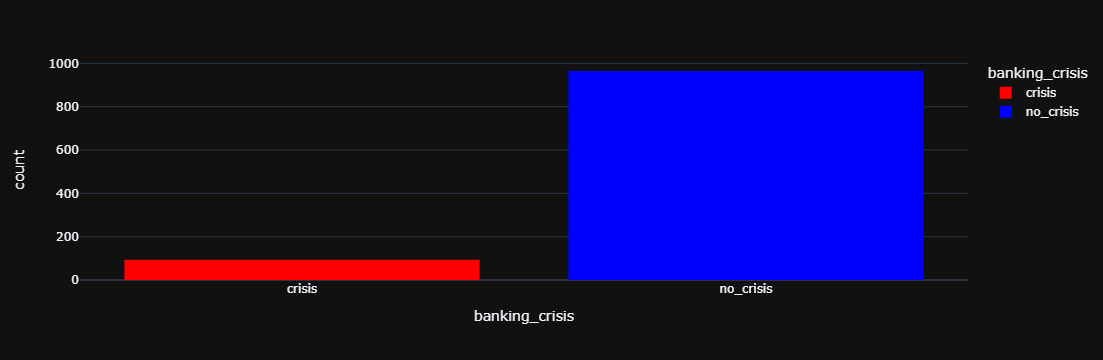

In [10]:
px.histogram(df,x='banking_crisis',color='banking_crisis',color_discrete_map={'crisis':'red','no_crisis':'Blue'},template='plotly_dark')

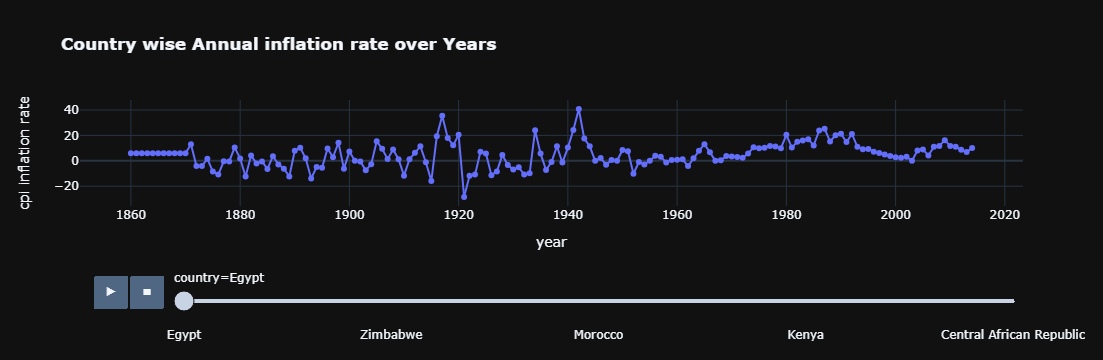

In [11]:
fig=px.line(df.sort_values(by='year'),x='year',y='inflation_annual_cpi',animation_frame='country',labels={'inflation_annual_cpi':'cpi inflation rate'},animation_group='year',color='country',markers=True,template='plotly_dark',title='<b> Country wise Annual inflation rate over Years')
fig.update_traces(showlegend=False)

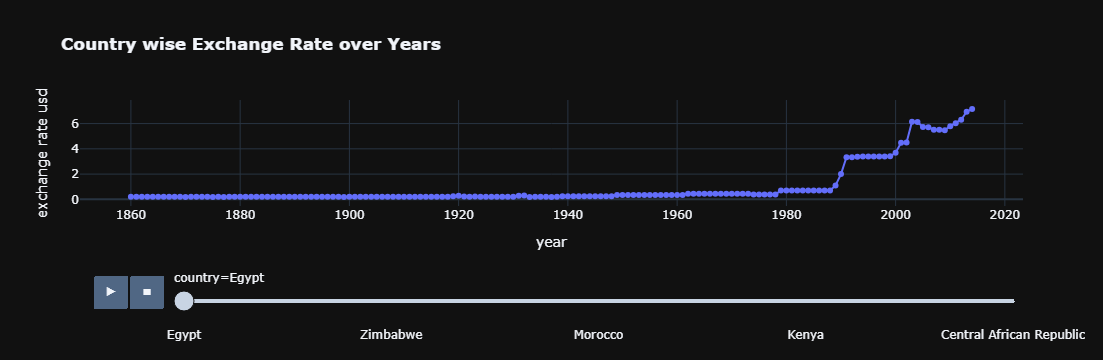

In [12]:
fig=px.line(df.sort_values(by='year'),x='year',y='exch_usd',animation_frame='country',labels={'exch_usd':'exchange rate usd'},animation_group='year',color='country',markers=True,template='plotly_dark',title='<b> Country wise Exchange Rate over Years')
fig.update_traces(showlegend=False)

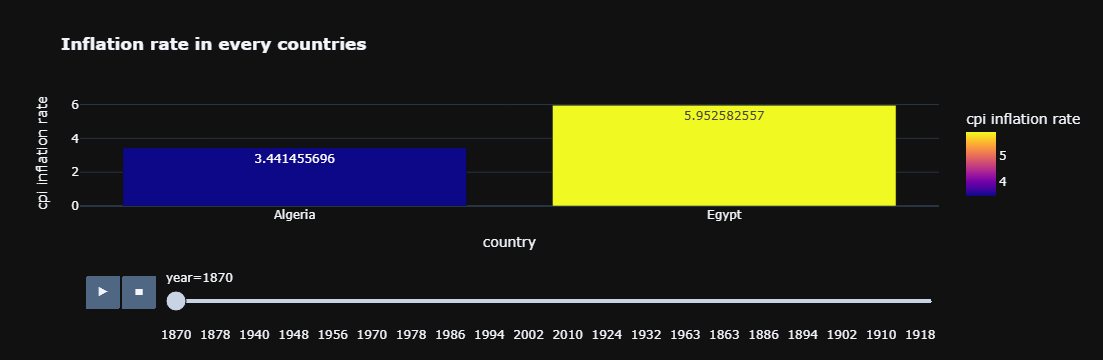

In [13]:
px.bar(df,x='country',y='inflation_annual_cpi',color='inflation_annual_cpi',animation_frame='year',text='inflation_annual_cpi',labels={'inflation_annual_cpi':'cpi inflation rate'},animation_group='country',template='plotly_dark',title='<b> Inflation rate in every countries')

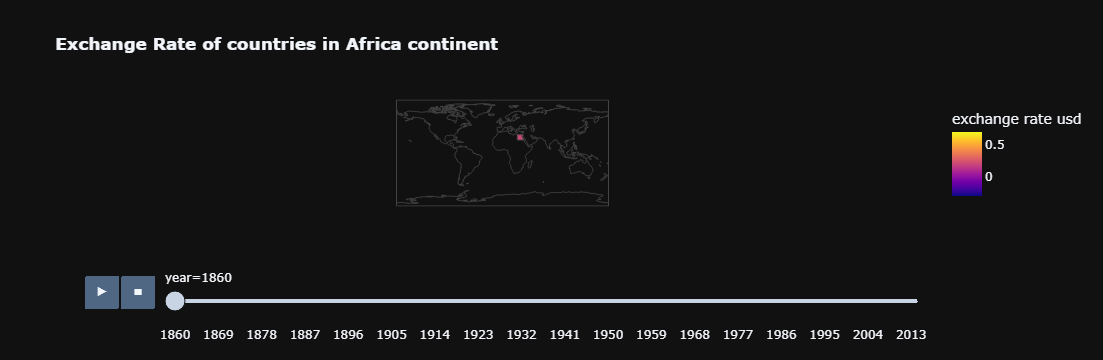

In [14]:
px.choropleth(df.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'exch_usd':'exchange rate usd','cc3':'code','country':'country'},animation_group='country',color='exch_usd',color_continuous_scale=px.colors.sequential.Plasma,title='<b>Exchange Rate of countries in Africa continent',template='plotly_dark')